In [20]:
import numpy as np
import pandas as pd

In [21]:
data = pd.read_csv("diabetes-dataset.csv")

In [22]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2,138,62,35,0,33.6,0.127,47,1
1,0,84,82,31,125,38.2,0.233,23,0
2,0,145,0,0,0,44.2,0.630,31,1
3,0,135,68,42,250,42.3,0.365,24,1
4,1,139,62,41,480,40.7,0.536,21,0


In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               2000 non-null   int64  
 1   Glucose                   2000 non-null   int64  
 2   BloodPressure             2000 non-null   int64  
 3   SkinThickness             2000 non-null   int64  
 4   Insulin                   2000 non-null   int64  
 5   BMI                       2000 non-null   float64
 6   DiabetesPedigreeFunction  2000 non-null   float64
 7   Age                       2000 non-null   int64  
 8   Outcome                   2000 non-null   int64  
dtypes: float64(2), int64(7)
memory usage: 140.8 KB


In [24]:
data.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

Data Visualisation

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

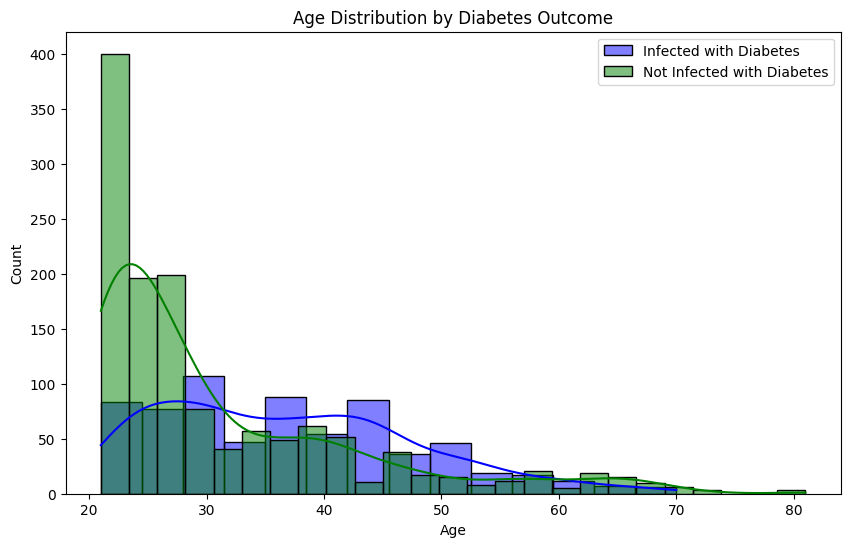

In [26]:

# Filter the data for infected (Outcome = 1) and not infected (Outcome = 0) individuals
infected = data[data['Outcome'] == 1]
not_infected = data[data['Outcome'] == 0]

# Create the bar plot
plt.figure(figsize=(10, 6))
sns.histplot(infected['Age'], kde=True, label='Infected with Diabetes', color='blue')
sns.histplot(not_infected['Age'], kde=True, label='Not Infected with Diabetes', color='green')

# Customize the plot
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Age Distribution by Diabetes Outcome')
plt.legend()

# Show the plot
plt.show()


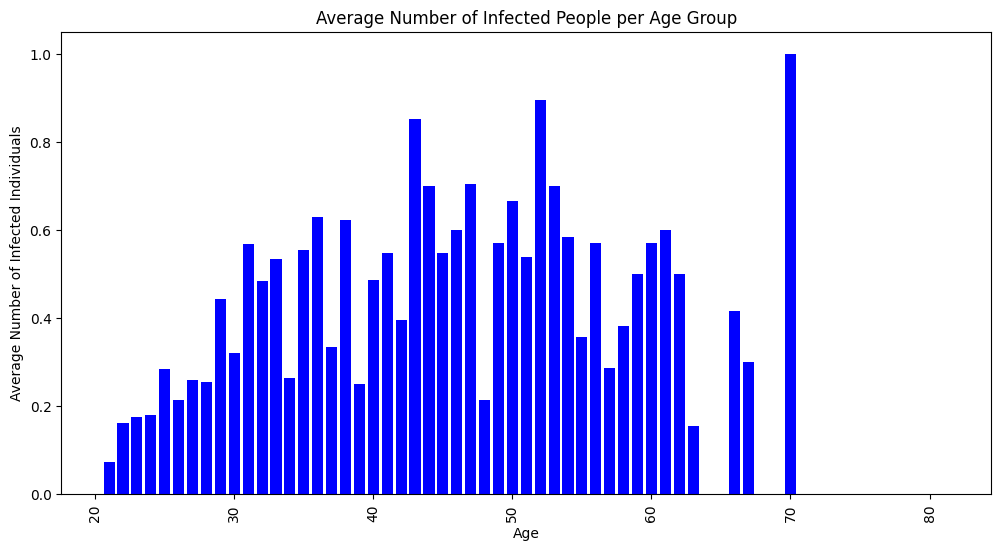

In [30]:
avg_infected_per_age = data.groupby('Age')['Outcome'].mean().reset_index()

# Create the bar plot
plt.figure(figsize=(12, 6))
plt.bar(avg_infected_per_age['Age'], avg_infected_per_age['Outcome'], color='blue')
plt.xlabel('Age')
plt.ylabel('Average Number of Infected Individuals')
plt.title('Average Number of Infected People per Age Group')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability

# Show the bar plot
plt.show()

On a broader perspective as age increases chance of getting infected with diabetes increases

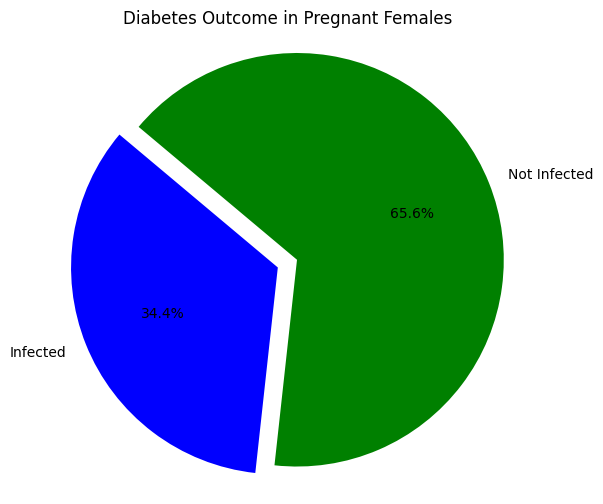

In [27]:
import matplotlib.pyplot as plt

# Filter the data for pregnant females (assuming Pregnancies > 0)
pregnant_females = data[data['Pregnancies'] > 0]

# Count the number of infected and not infected pregnant females
infected_count = len(pregnant_females[pregnant_females['Outcome'] == 1])
not_infected_count = len(pregnant_females[pregnant_females['Outcome'] == 0])

# Create data for the pie chart
labels = ['Infected', 'Not Infected']
sizes = [infected_count, not_infected_count]
colors = ['blue', 'green']
explode = (0.1, 0)  # Explode the 'Infected' slice for emphasis

# Create the pie chart
plt.figure(figsize=(6, 6))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Diabetes Outcome in Pregnant Females')
plt.axis('equal')  # Equal aspect ratio ensures that the pie is circular

# Show the pie chart
plt.show()


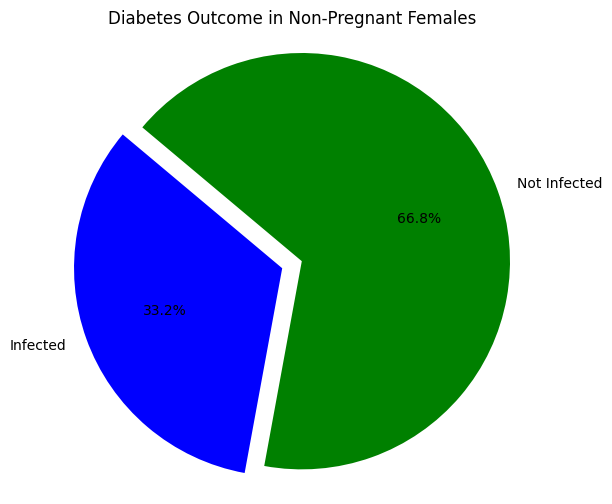

In [29]:
import matplotlib.pyplot as plt

# Filter the data for non-pregnant females (assuming Pregnancies == 0)
non_pregnant_females = data[data['Pregnancies'] == 0]

# Count the number of infected and not infected non-pregnant females
infected_count = len(non_pregnant_females[non_pregnant_females['Outcome'] == 1])
not_infected_count = len(non_pregnant_females[non_pregnant_females['Outcome'] == 0])

# Create data for the pie chart
labels = ['Infected', 'Not Infected']
sizes = [infected_count, not_infected_count]
colors = ['blue', 'green']
explode = (0.1, 0)  # Explode the 'Infected' slice for emphasis

# Create the pie chart
plt.figure(figsize=(6, 6))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Diabetes Outcome in Non-Pregnant Females')
plt.axis('equal')  # Equal aspect ratio ensures that the pie is circular

# Show the pie chart
plt.show()


This shows that Pregnant females may have higher risk from getting infected from Diabetes

In [39]:
average_BMI = data['BMI'].mean()

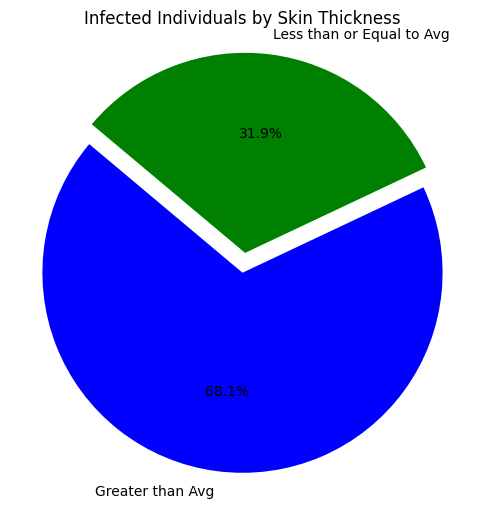

In [41]:
greater_than_avg = data[(data['Outcome'] == 1) & (data['BMI'] > average_BMI)]
less_than_avg = data[(data['Outcome'] == 1) & (data['BMI'] <= average_BMI)]

# Count the number of infected individuals in each group
greater_than_avg_count = len(greater_than_avg)
less_than_avg_count = len(less_than_avg)

# Create data for the pie chart
labels = ['Greater than Avg', 'Less than or Equal to Avg']
sizes = [greater_than_avg_count, less_than_avg_count]
colors = ['blue', 'green']
explode = (0.1, 0)  # Explode the 'Greater than Avg' slice for emphasis

# Create the pie chart
plt.figure(figsize=(6, 6))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Infected Individuals by Skin Thickness')
plt.axis('equal')  # Equal aspect ratio ensures that the pie is circular

# Show the pie chart
plt.show()

This shows that people having more BMI are haveing more risk of Diabetes


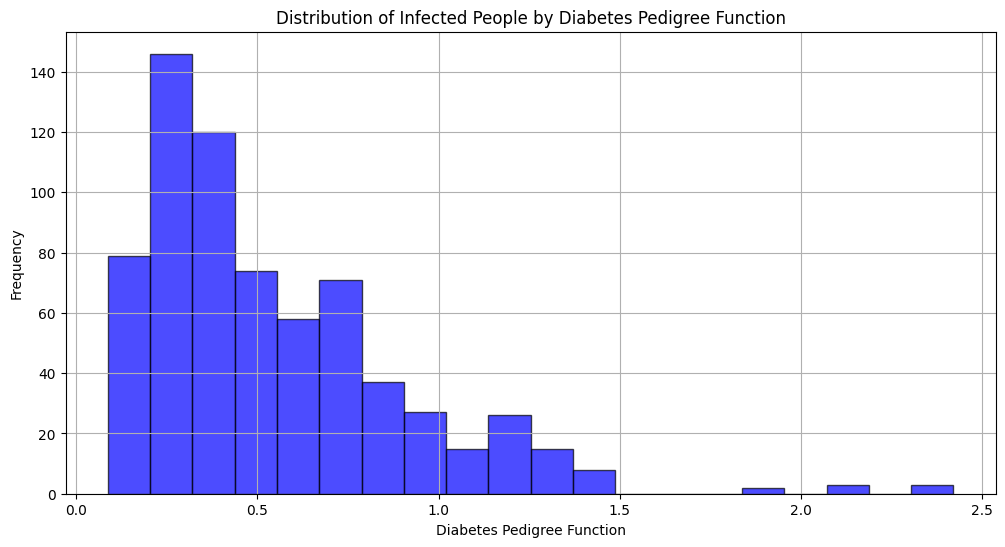

In [47]:
infected = data[data['Outcome'] == 1]

# Create a histogram for the diabetes pedigree function in infected individuals
plt.figure(figsize=(12, 6))
plt.hist(infected['DiabetesPedigreeFunction'], bins=20, color='blue', alpha=0.7, edgecolor='black')
plt.xlabel('Diabetes Pedigree Function')
plt.ylabel('Frequency')
plt.title('Distribution of Infected People by Diabetes Pedigree Function')
plt.grid(True)

# Show the histogram
plt.show()


This shows that the person having Diabetes Pedigree function value from 0.2 to 0.8 have higher chance of getting infected

In [49]:
avg_blood = data['BloodPressure']

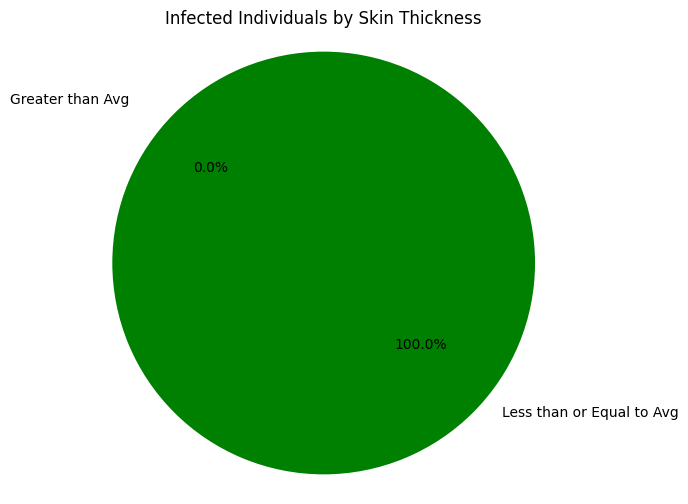

In [51]:
greater_than_avgbp = data[(data['Outcome'] == 1) & (data['BloodPressure'] > avg_blood)]
less_than_avgbp = data[(data['Outcome'] == 1) & (data['BloodPressure'] <= avg_blood)]

# Count the number of infected individuals in each group
greater_than_avg_countbp = len(greater_than_avgbp)
less_than_avg_countbp = len(less_than_avgbp)

# Create data for the pie chart
labelsbp = ['Greater than Avg', 'Less than or Equal to Avg']
sizesbp = [greater_than_avg_countbp, less_than_avg_countbp]
colorsbp = ['blue', 'green']
explodebp= (0.1, 0)  # Explode the 'Greater than Avg' slice for emphasis

# Create the pie chart
plt.figure(figsize=(6, 6))
plt.pie(sizesbp, explode=explodebp, labels=labelsbp, colors=colorsbp, autopct='%1.1f%%', startangle=140)
plt.title('Infected Individuals by Skin Thickness')
plt.axis('equal')  # Equal aspect ratio ensures that the pie is circular

# Show the pie chart
plt.show()

In [52]:
data = data.drop("Insulin", axis=1)


In [53]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               2000 non-null   int64  
 1   Glucose                   2000 non-null   int64  
 2   BloodPressure             2000 non-null   int64  
 3   SkinThickness             2000 non-null   int64  
 4   BMI                       2000 non-null   float64
 5   DiabetesPedigreeFunction  2000 non-null   float64
 6   Age                       2000 non-null   int64  
 7   Outcome                   2000 non-null   int64  
dtypes: float64(2), int64(6)
memory usage: 125.1 KB
